# SW Activity: Iris Classification using Logistic Regression

In this activity we will be using the well known Iris Species dataset [https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set) created in 1936 by botanist Ronald Fisher.  The dataset contains Sepal and Petal Length and Width measurements of three different Iris flower species *Iris setosa*, *Iris versicolor*, *Iris virginica*.  Throughout this activity we will use the measurements provided in the dataset to classify the different flower species.

## Import the Required Packages
For this exercise we will require the Pandas package for loading the data, the matplotlib package for plotting as well as scitkit-learn for creating the Logistic Regression model.  Import all of the required packages and relevant modules for these tasks.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

## Load the Data
Load the Iris dataset using Pandas and examine the first 5 rows

In [101]:
data = pd.read_csv('IRIS.csv')

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Check for the shape of the dataset

In [102]:
data.shape

(150, 5)

Check for missing values

In [103]:
print('DATA MISSING VALUES:')
print(data.isna().sum())

DATA MISSING VALUES:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Check for duplicates and removing them

In [104]:
print(f'Duplicates in dataset: {data.duplicated().sum()}')

data = data.drop_duplicates()

print(f'Duplicates in dataset now: {data.duplicated().sum()}')
data.shape

Duplicates in dataset: 3
Duplicates in dataset now: 0


(147, 5)

Check for cardinality and datatypes of each column

In [105]:
print('Unique values:')
print(data.nunique())
print()
print('Datatypes:')
print(data.dtypes)

Unique values:
sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

Datatypes:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


sepal_length, sepal_width, petal_length, petal_width are continuous.

species is categorical.

Check for target distribution

Text(0.5, 1.0, 'Target distribution')

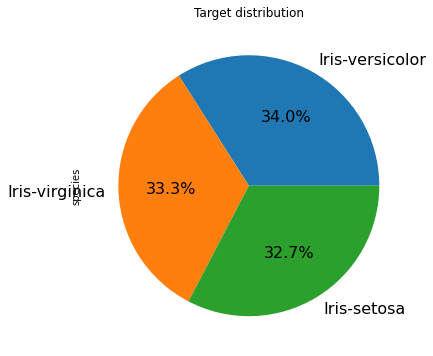

In [106]:
# Figure size
plt.figure(figsize=(6,6))

# Pie plot
data['species'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':16}).set_title("Target distribution")

Target is distributed equally (I think so)

## Feature Engineering
We need to select the most appropriate features that will provide the most powerful classification model.  Plot a number of different features vs the allocated species classifications e.g. Sepal Length vs Petal length and Species.  Visually inspect the plots and look for any patterns that could indicate separation between each of the species.

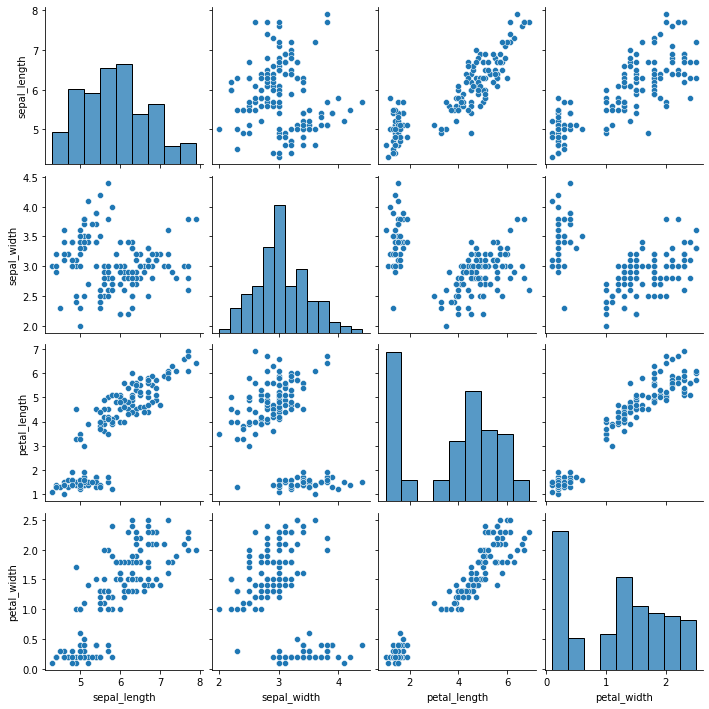

In [107]:
import seaborn as sns
sns.pairplot(data)

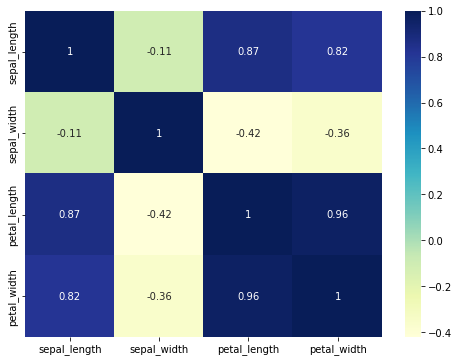

In [108]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Constructing the Logistic Regression Model
Before we can construct the model we must first convert the species values into labels that can be used within the model.  Replace:

1. The species string *Iris-setosa* with the value 0
2. The species string *Iris-versicolor* with the value 1
3. The species string *Iris-virginica* with the value 2

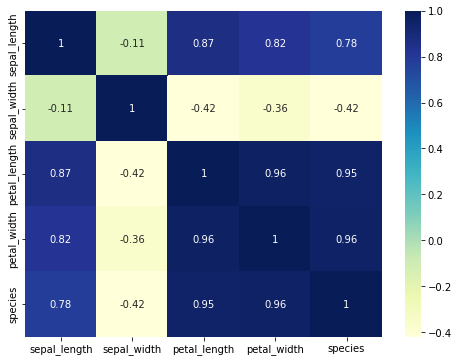

In [109]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['species'] = encoder.fit_transform(data['species'])
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

Plotting the relationship of each feature to know which features to use on the first selection.

In [110]:
def plot(x, hue, title):
  # Figure size
  plt.figure(figsize=(10,4))

  # Histogram
  sns.histplot(data=data, x=x, hue=hue, binwidth=1, kde=True)

  # Aesthetics
  plt.title(title)
  plt.xlabel(x)

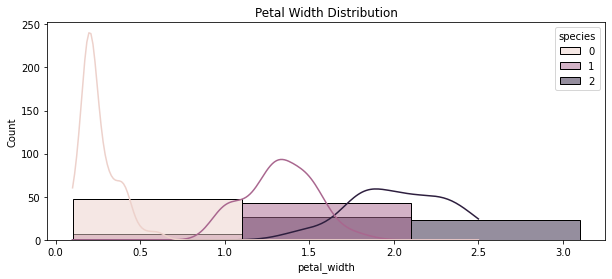

In [111]:
plot('petal_width', 'species', 'Petal Width Distribution')

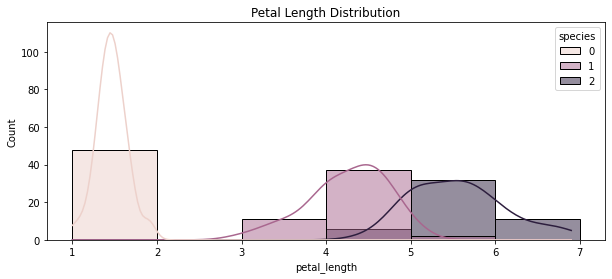

In [112]:
plot('petal_length', 'species', 'Petal Length Distribution')

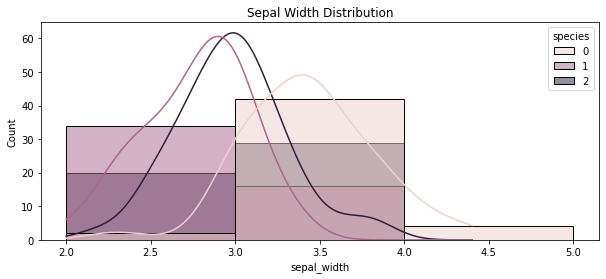

In [113]:
plot('sepal_width', 'species', 'Sepal Width Distribution')

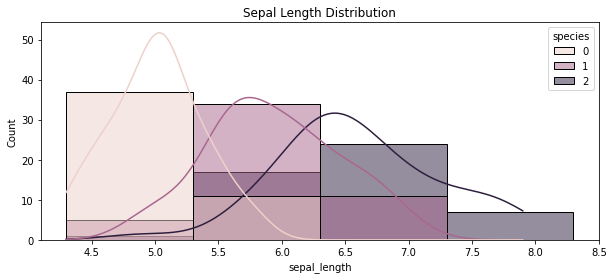

In [114]:
plot('sepal_length', 'species', 'Sepal Length Distribution')

The petal width and length shows a more distinct distribution related to species so they will be picked first.

Select the features by writing the column names in the list below:

In [115]:
selected_features = [
    'petal_length',
    'petal_width'
]

Create the model using the *selected_features* and the assigned *species* labels

In [116]:
target = ['species']
X1 = data[selected_features]
y1 = data[target]

In [117]:
from sklearn.model_selection import train_test_split

test_size = 0.33
random_state = 1

X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X1,y1,test_size=test_size,random_state=random_state)

Compute the accuracy of the model against the training set:

In [118]:
solver = 'liblinear'
model1 = LogisticRegression(solver=solver, max_iter=500, tol=0.1)
model1.fit(X_train1, y_train1)
model1.score(X_valid1, y_valid1) * 100

85.71428571428571

Construct another model using your second choice *selected_features* and compare the performance:

In [119]:
selected_features_2 = [
    'sepal_length',
    'sepal_width'
]

X2 = data[selected_features_2]
y2 = data[target]

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2,y2,test_size=test_size,random_state=random_state)

model2 = LogisticRegression(solver=solver, max_iter=500, tol=0.1)
model2.fit(X_train2, y_train2)
model2.score(X_valid2, y_valid2) * 100

67.3469387755102

Previous model has a higher accuracy

Construct another model using all available information and compare the performance:

In [120]:
X = data.drop(target, axis = 1)
y = data[target]

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=test_size,random_state=random_state)

model = LogisticRegression(solver=solver, max_iter=500, tol=0.1)
model.fit(X_train, y_train)
model.score(X_valid, y_valid) * 100

97.95918367346938